In [10]:
import os
from glob import glob # extract path of each file
import pandas as pd # data preprocessing
from xml.etree import ElementTree as et # parse information from XML
from functools import reduce

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# step-1: get path of each xml file
xmlfiles = glob('./dataset/*.xml')
# replace \\ with /
replace_text = lambda x: x.replace('\\','/')
xmlfiles = list(map(replace_text,xmlfiles))

In [15]:
xmlfiles

['./dataset/image 194 (copy).xml',
 './dataset/image 201.xml',
 './dataset/6350916 (copy).xml',
 './dataset/image 180.xml',
 './dataset/2650860.xml',
 './dataset/Screenshot from 2023-12-20 16-29-11 (copy).xml',
 './dataset/image 176 (copy).xml',
 './dataset/image 215 (another copy).xml',
 './dataset/Screenshot from 2023-12-21 10-27-14 (another copy).xml',
 './dataset/image 224.xml',
 './dataset/Screenshot from 2023-12-19 11-12-10 (copy).xml',
 './dataset/image 199 (copy).xml',
 './dataset/image 210 (copy).xml',
 './dataset/Screenshot from 2023-12-19 11-12-10.xml',
 './dataset/header-image-behind-menu (copy).xml',
 './dataset/image 166 (copy).xml',
 './dataset/image 176.xml',
 './dataset/image 243.xml',
 './dataset/image 195.xml',
 './dataset/landing_page (1).xml',
 './dataset/2650860 (copy).xml',
 './dataset/image 241.xml',
 './dataset/image 173.xml',
 './dataset/image 206.xml',
 './dataset/2908596 (copy).xml',
 './dataset/Screenshot from 2023-12-19 10-51-28 (copy).xml',
 './dataset/im

In [16]:
# step-2: read xml files
# from each xml file we need to extract
# filename, size(width, height), object(name, xmin, xmax, ymin, ymax)
def extract_text(filename):
    tree = et.parse(filename)
    root = tree.getroot()

    # extract filename
    image_name = root.find('filename').text
    # width and height of the image
    width = root.find('size').find('width').text
    height = root.find('size').find('height').text
    objs = root.findall('object')
    parser = []
    for obj in objs:
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        xmax = bndbox.find('xmax').text
        ymin = bndbox.find('ymin').text
        ymax = bndbox.find('ymax').text
        parser.append([image_name, width, height, name,xmin,xmax,ymin,ymax])
        
    return parser

In [17]:
parser_all = list(map(extract_text,xmlfiles))

In [18]:
data = reduce(lambda x, y : x+y,parser_all)

In [19]:
df = pd.DataFrame(data,columns = ['filename','width','height','name','xmin','xmax','ymin','ymax'])

In [20]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,image 194 (copy).png,1729,802,menu,23,1686,2,133
1,image 201.png,1802,905,menu-bar,53,1797,20,184
2,6350916 (copy).jpg,3200,2000,menu-bar,309,2901,353,596
3,image 180.png,1532,821,menu-bar,21,1508,5,163
4,2650860.jpg,3000,2000,menu-bar,308,2715,200,421


In [21]:
df.shape

(242, 8)

In [43]:
df['name'].value_counts()

name
menu          116
menu-bar      111
menu-icon      14
decorators      1
Name: count, dtype: int64

#### Conversion
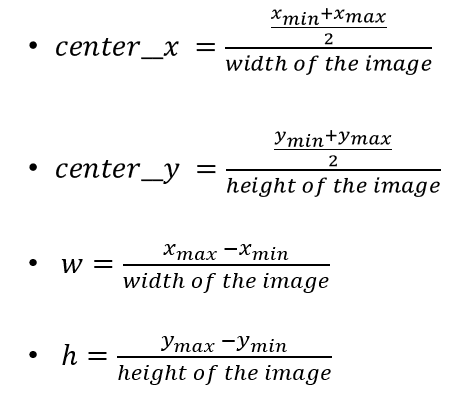

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  242 non-null    object 
 1   width     242 non-null    int64  
 2   height    242 non-null    int64  
 3   name      242 non-null    object 
 4   xmin      242 non-null    int64  
 5   xmax      242 non-null    int64  
 6   ymin      242 non-null    int64  
 7   ymax      242 non-null    int64  
 8   center_x  242 non-null    float64
 9   center_y  242 non-null    float64
 10  w         242 non-null    float64
 11  h         242 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 22.8+ KB


In [45]:
# type conversion
cols = ['width','height','xmin','xmax','ymin','ymax']
df[cols] = df[cols].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  242 non-null    object 
 1   width     242 non-null    int64  
 2   height    242 non-null    int64  
 3   name      242 non-null    object 
 4   xmin      242 non-null    int64  
 5   xmax      242 non-null    int64  
 6   ymin      242 non-null    int64  
 7   ymax      242 non-null    int64  
 8   center_x  242 non-null    float64
 9   center_y  242 non-null    float64
 10  w         242 non-null    float64
 11  h         242 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 22.8+ KB


In [46]:
# center x, center y
df['center_x'] = ((df['xmax']+df['xmin'])/2)/df['width']
df['center_y'] = ((df['ymax']+df['ymin'])/2)/df['height']
# w 
df['w'] = (df['xmax']-df['xmin'])/df['width']
# h 
df['h'] = (df['ymax']-df['ymin'])/df['height']

In [47]:
df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,image 194 (copy).png,1729,802,menu,23,1686,2,133,0.494216,0.084165,0.961828,0.163342
1,image 201.png,1802,905,menu-bar,53,1797,20,184,0.513319,0.112707,0.967814,0.181215
2,6350916 (copy).jpg,3200,2000,menu-bar,309,2901,353,596,0.501563,0.237250,0.810000,0.121500
3,image 180.png,1532,821,menu-bar,21,1508,5,163,0.499021,0.102314,0.970627,0.192448
4,2650860.jpg,3000,2000,menu-bar,308,2715,200,421,0.503833,0.155250,0.802333,0.110500


### split data into train and test

In [48]:
images = df['filename'].unique()

In [49]:
len(images)

242

In [50]:
# 80% train and 20% test
img_df = pd.DataFrame(images,columns=['filename'])
img_train = tuple(img_df.sample(frac=0.8)['filename']) # shuffle and pick 80% of images

In [51]:
img_test = tuple(img_df.query(f'filename not in {img_train}')['filename']) # take rest 20% images

In [52]:
len(img_train), len(img_test)

(194, 48)

In [53]:
train_df = df.query(f'filename in {img_train}')
test_df = df.query(f'filename in {img_test}')

In [54]:
train_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
0,image 194 (copy).png,1729,802,menu,23,1686,2,133,0.494216,0.084165,0.961828,0.163342
1,image 201.png,1802,905,menu-bar,53,1797,20,184,0.513319,0.112707,0.967814,0.181215
3,image 180.png,1532,821,menu-bar,21,1508,5,163,0.499021,0.102314,0.970627,0.192448
5,Screenshot from 2023-12-20 16-29-11 (copy).png,1294,599,menu-icon,1104,1215,241,291,0.896059,0.444073,0.085781,0.083472
6,image 176 (copy).png,1532,758,menu,8,1525,9,215,0.500326,0.147757,0.990209,0.271768


In [55]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h
2,6350916 (copy).jpg,3200,2000,menu-bar,309,2901,353,596,0.501563,0.237250,0.810000,0.121500
4,2650860.jpg,3000,2000,menu-bar,308,2715,200,421,0.503833,0.155250,0.802333,0.110500
7,image 215 (another copy).png,1882,826,menu-bar,20,1882,5,197,0.505313,0.122276,0.989373,0.232446
9,image 224.png,1889,650,menu,20,1872,4,204,0.500794,0.160000,0.980413,0.307692
11,image 199 (copy).png,1516,731,menu-bar,12,1512,3,176,0.502639,0.122435,0.989446,0.236662


### Assign id number to object names

In [56]:
# label encoding
def label_encoding(x):
    labels = {'menu':0, 'menu-bar':1, 'menu-icon':2,'decorators':3}
    return labels[x]

In [57]:
train_df['id'] = train_df['name'].apply(label_encoding)
test_df['id'] = test_df['name'].apply(label_encoding)

In [58]:
train_df.head(10)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,image 194 (copy).png,1729,802,menu,23,1686,2,133,0.494216,0.084165,0.961828,0.163342,0
1,image 201.png,1802,905,menu-bar,53,1797,20,184,0.513319,0.112707,0.967814,0.181215,1
3,image 180.png,1532,821,menu-bar,21,1508,5,163,0.499021,0.102314,0.970627,0.192448,1
5,Screenshot from 2023-12-20 16-29-11 (copy).png,1294,599,menu-icon,1104,1215,241,291,0.896059,0.444073,0.085781,0.083472,2
6,image 176 (copy).png,1532,758,menu,8,1525,9,215,0.500326,0.147757,0.990209,0.271768,0
8,Screenshot from 2023-12-21 10-27-14 (another c...,801,597,menu,100,694,149,230,0.495630,0.317420,0.741573,0.135678,0
10,Screenshot from 2023-12-19 11-12-10 (copy).png,1230,547,menu-bar,16,1173,10,129,0.483333,0.127057,0.940650,0.217550,1
12,image 210 (copy).png,1887,934,menu,13,1851,11,259,0.493906,0.144540,0.974033,0.265525,0
14,header-image-behind-menu (copy).png,1670,518,menu-bar,6,1669,127,374,0.501497,0.483591,0.995808,0.476834,1
15,image 166 (copy).png,1532,635,menu,6,1514,3,135,0.496084,0.108661,0.984334,0.207874,0


### Save Image and Labels in text

In [59]:
import os
from shutil import move

In [64]:
train_folder = '/home/lenovo/temp-image-detec/dataset/train'
test_folder = '/home/lenovo/temp-image-detec/dataset/test'


# os.mkdir(train_folder)
# os.mkdir(test_folder)

In [65]:
cols = ['filename','id','center_x','center_y', 'w', 'h']
groupby_obj_train = train_df[cols].groupby('filename')
groupby_obj_test = test_df[cols].groupby('filename')

In [69]:
#groupby_obj_train.get_group('000009.jpg').set_index('filename').to_csv('sample.txt',index=False,header=False)
# save each image in train/test folder and repective labels in .txt
def save_data(filename, folder_path, group_obj):
    # move image
    src = os.path.join('dataset',filename)
    dst = os.path.join(folder_path,filename)
    move(src,dst) # move image to the destination folder
    
    # save the labels
    text_filename = os.path.join(folder_path,
                                 os.path.splitext(filename)[0]+'.txt')
    group_obj.get_group(filename).set_index('filename').to_csv(text_filename,sep=' ',index=False,header=False)
    

In [72]:
filename_series = pd.Series(groupby_obj_train.groups.keys())

In [73]:
filename_series.apply(save_data,args=(train_folder,groupby_obj_train))

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/2650860 (copy).jpg'

In [74]:
filename_series_test = pd.Series(groupby_obj_test.groups.keys())
filename_series_test.apply(save_data,args=(test_folder,groupby_obj_test))

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
43    None
44    None
45    None
46    None
47    None
dtype: object